In [47]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from scipy.linalg import orth
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.decomposition import PCA
import torch as t
from terminaltables import AsciiTable as Table
from tqdm.notebook import tqdm

In [48]:
import os
import sys
sys.path.append('../src')

from nb_utils import *
from utils import accumulate_grads_over_epochs

In [52]:
EPOCH = 10
folders = ['mnist_100', 'fmnist_100', 'cifar_100']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, 
                        ['conj', 'kgrad', 'topk', 
                         'adam', 'nc', 'rp', 'orth', 'pso'], 
                        ['lr_0.1', 'noise']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        extract = pkl.load(open(file, 'rb'))
        grads = extract[-1]
        for grads 
        print(len(extract))

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_100/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_10_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
11
../ckpts/mnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_1_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
11
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_100/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_10_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
11
../ckpts/fmnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_1_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
11
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckp

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_100/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_10_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
EP: 0
[(100, 7840), (100, 10)]


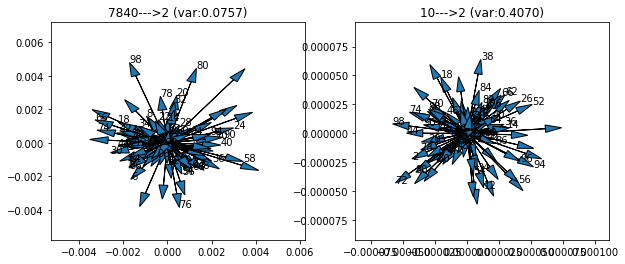

EP: 1
[(100, 7840), (100, 10)]


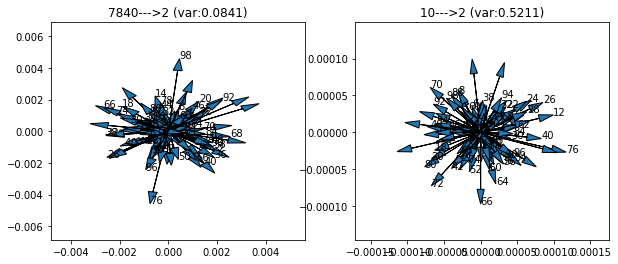

EP: 2
[(100, 7840), (100, 10)]


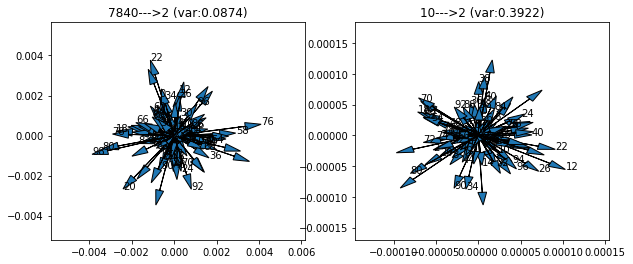

EP: 3
[(100, 7840), (100, 10)]


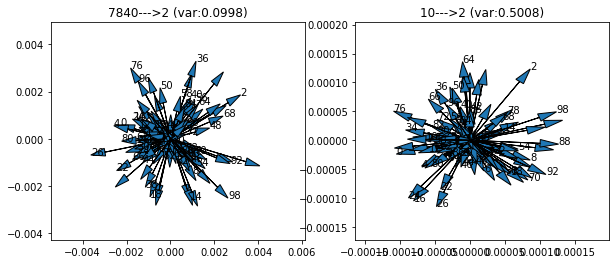

EP: 4
[(100, 7840), (100, 10)]


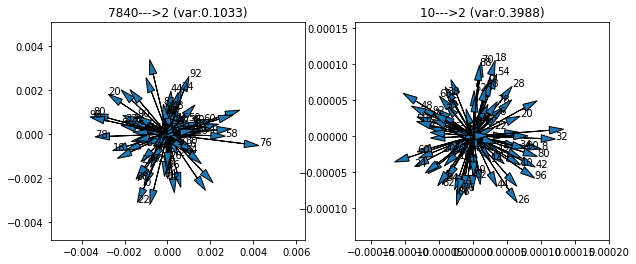

EP: 5
[(100, 7840), (100, 10)]


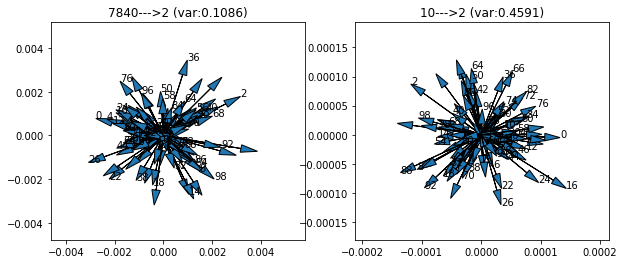

EP: 6
[(100, 7840), (100, 10)]


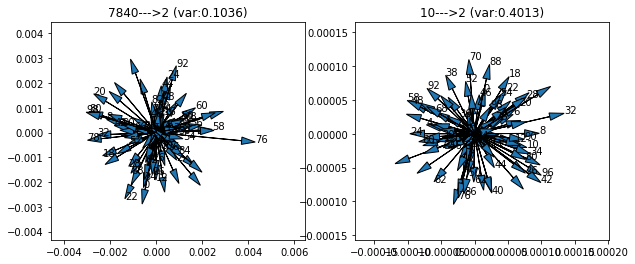

EP: 7
[(100, 7840), (100, 10)]


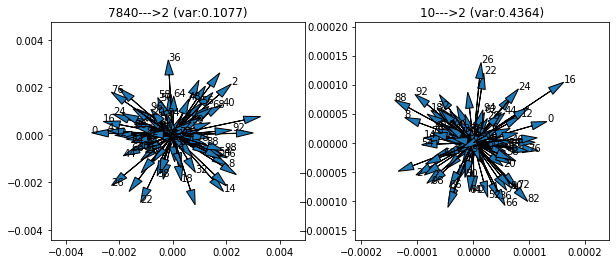

EP: 8
[(100, 7840), (100, 10)]


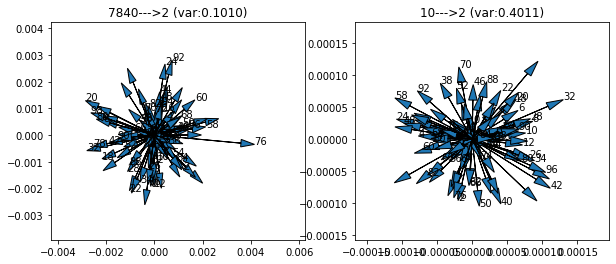

EP: 9
[(100, 7840), (100, 10)]


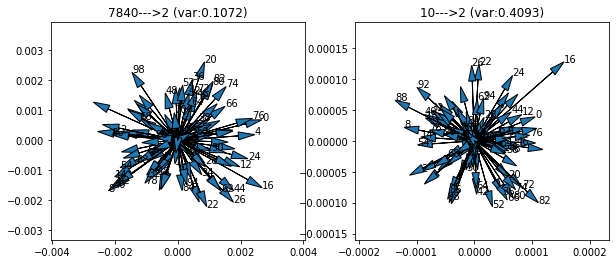

../ckpts/mnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_1_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
EP: 0
[(100, 7840), (100, 10)]


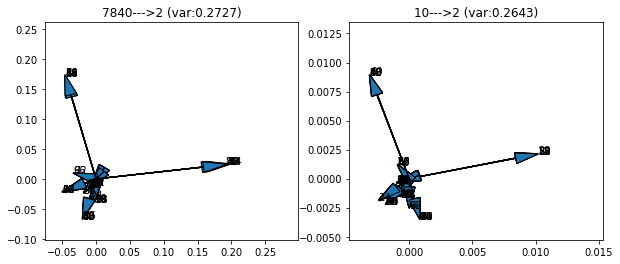

EP: 1
[(100, 7840), (100, 10)]


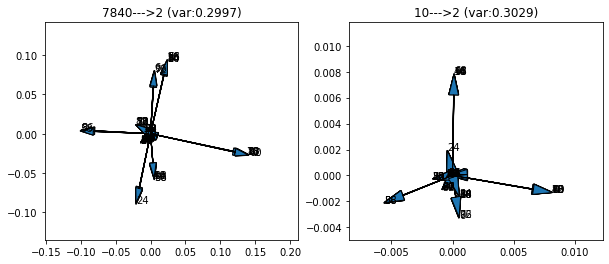

EP: 2
[(100, 7840), (100, 10)]


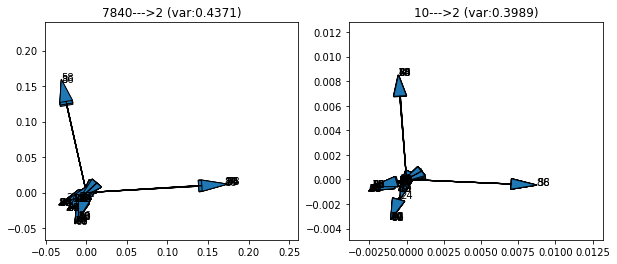

EP: 3
[(100, 7840), (100, 10)]


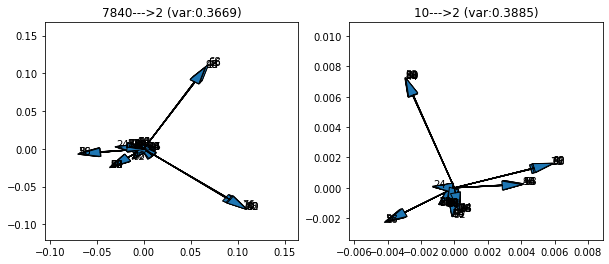

EP: 4
[(100, 7840), (100, 10)]


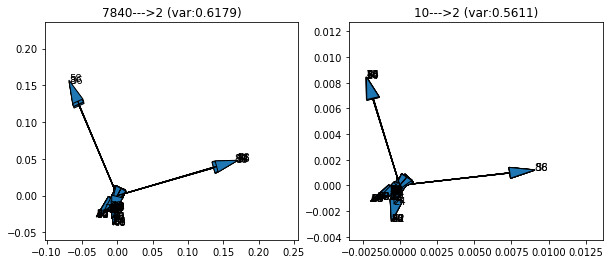

EP: 5
[(100, 7840), (100, 10)]


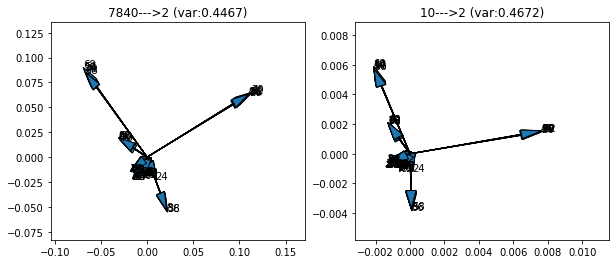

EP: 6
[(100, 7840), (100, 10)]


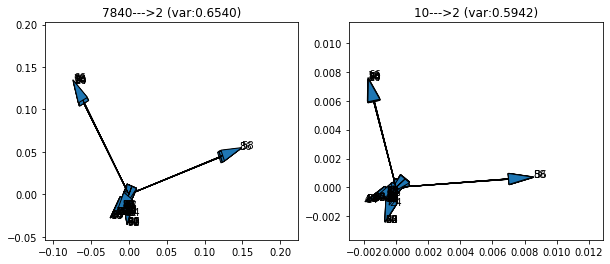

EP: 7
[(100, 7840), (100, 10)]


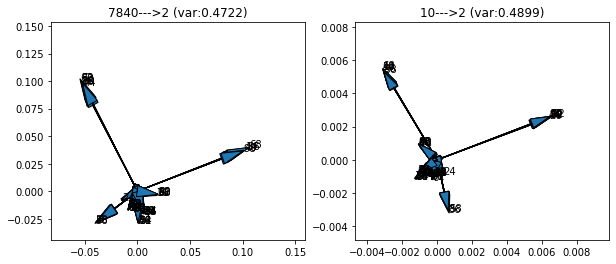

EP: 8
[(100, 7840), (100, 10)]


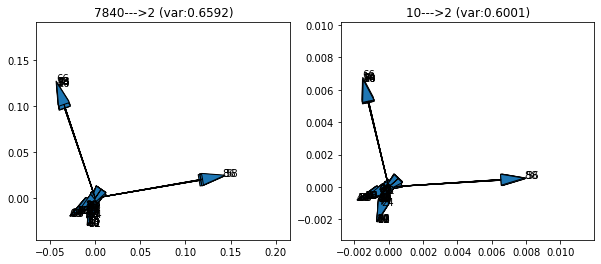

EP: 9
[(100, 7840), (100, 10)]


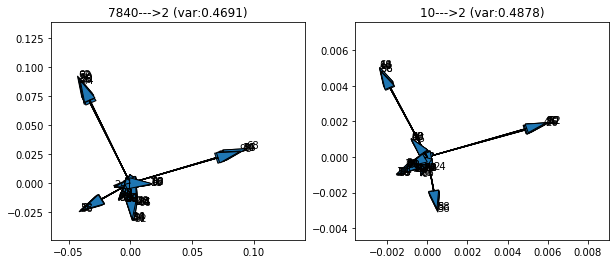

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_100/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_10_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
EP: 0
[(100, 7840), (100, 10)]


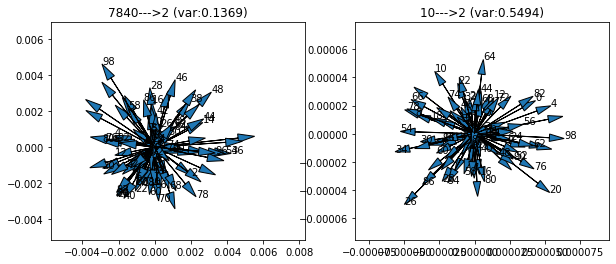

EP: 1
[(100, 7840), (100, 10)]


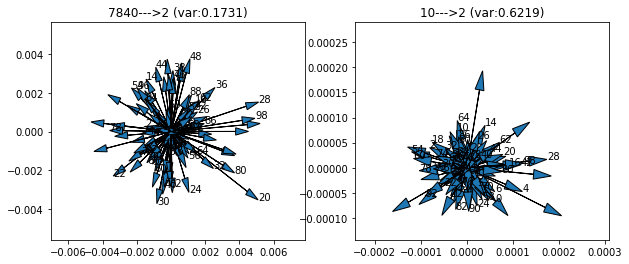

EP: 2
[(100, 7840), (100, 10)]


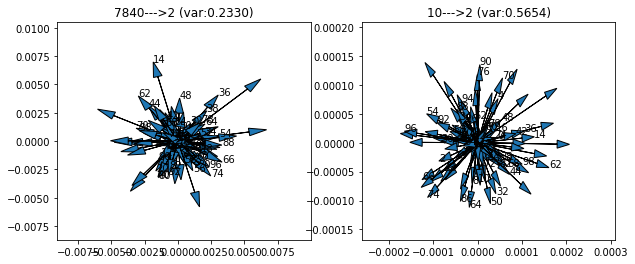

EP: 3
[(100, 7840), (100, 10)]


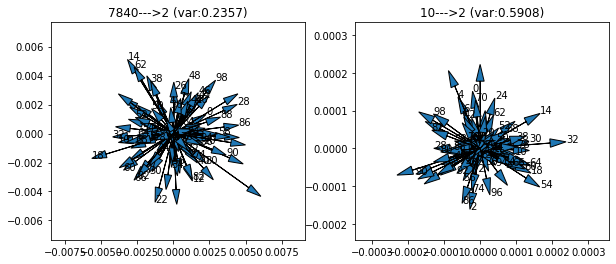

EP: 4
[(100, 7840), (100, 10)]


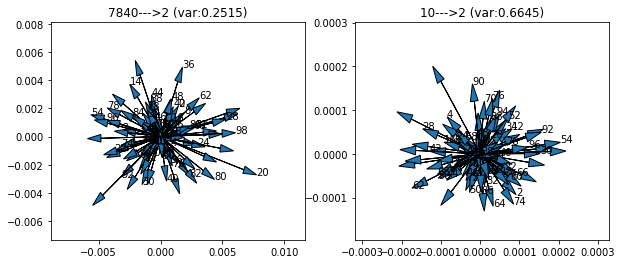

EP: 5
[(100, 7840), (100, 10)]


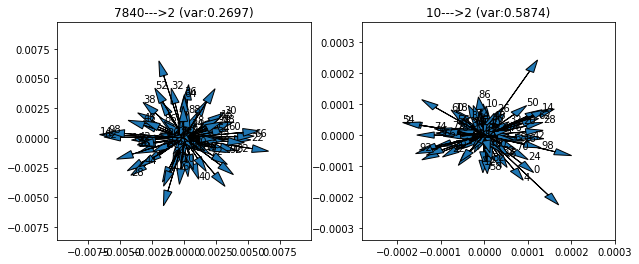

EP: 6
[(100, 7840), (100, 10)]


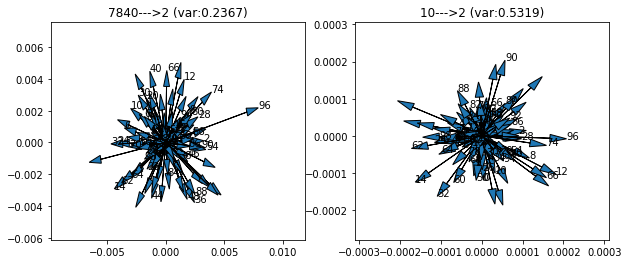

EP: 7
[(100, 7840), (100, 10)]


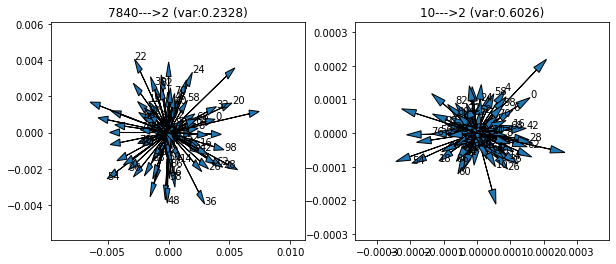

EP: 8
[(100, 7840), (100, 10)]


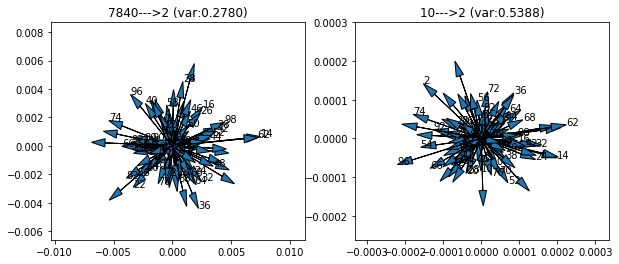

EP: 9
[(100, 7840), (100, 10)]


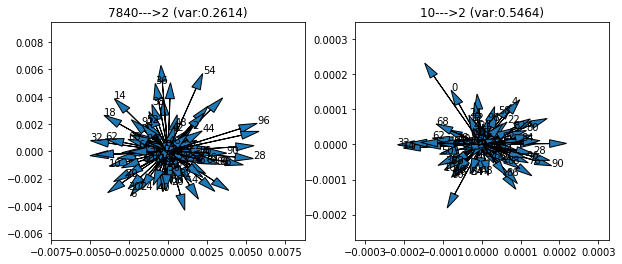

../ckpts/fmnist_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_1_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
EP: 0
[(100, 7840), (100, 10)]


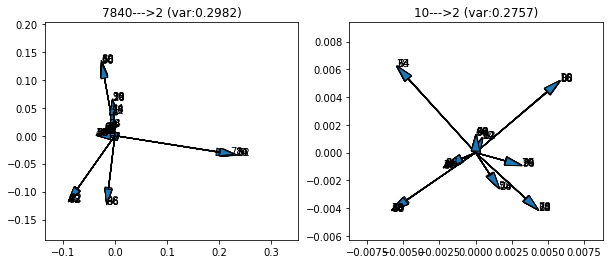

EP: 1
[(100, 7840), (100, 10)]


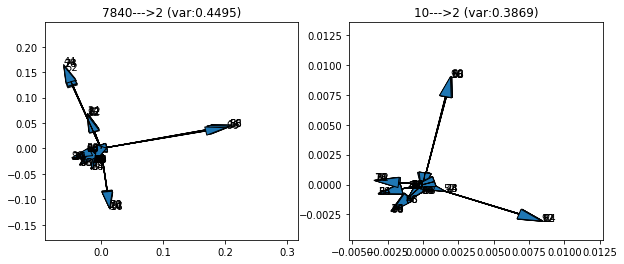

EP: 2
[(100, 7840), (100, 10)]


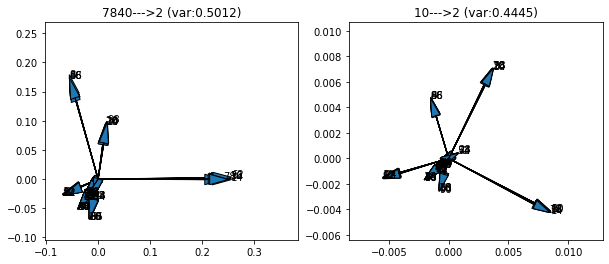

EP: 3
[(100, 7840), (100, 10)]


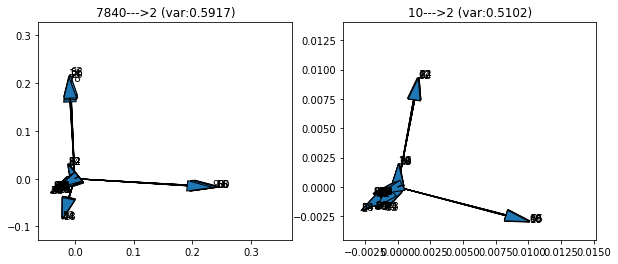

EP: 4
[(100, 7840), (100, 10)]


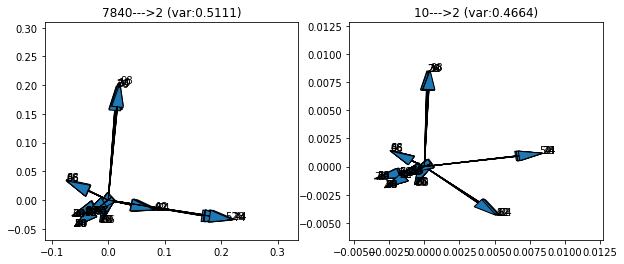

EP: 5
[(100, 7840), (100, 10)]


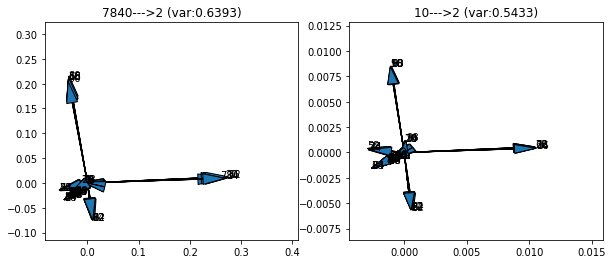

EP: 6
[(100, 7840), (100, 10)]


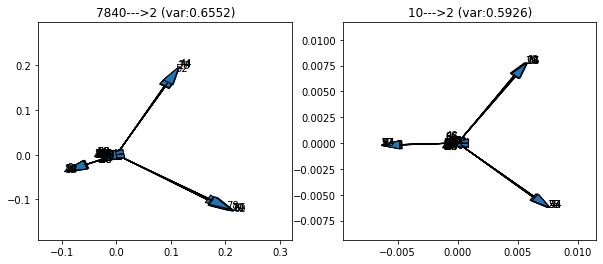

EP: 7
[(100, 7840), (100, 10)]


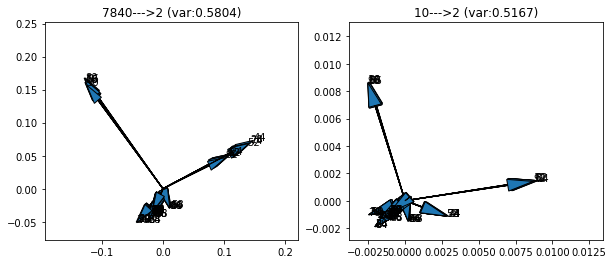

EP: 8
[(100, 7840), (100, 10)]


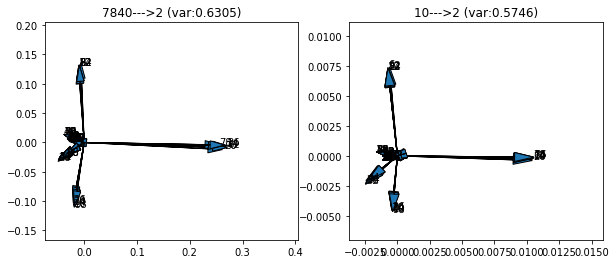

EP: 9
[(100, 7840), (100, 10)]


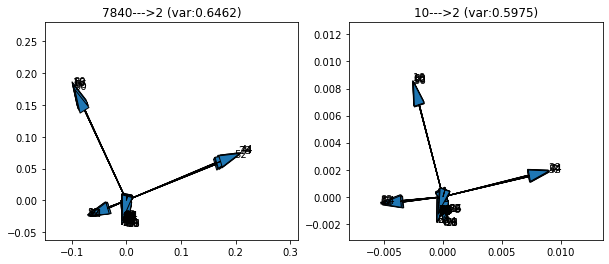

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_100/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_10_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
EP: 0
[(100, 30720), (100, 10)]


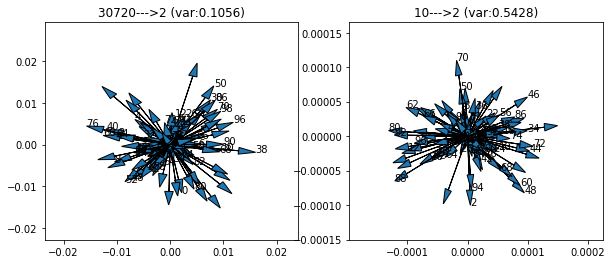

EP: 1
[(100, 30720), (100, 10)]


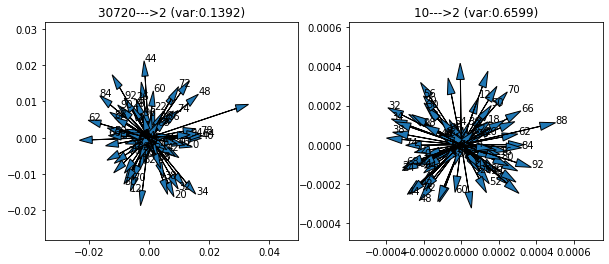

EP: 2
[(100, 30720), (100, 10)]


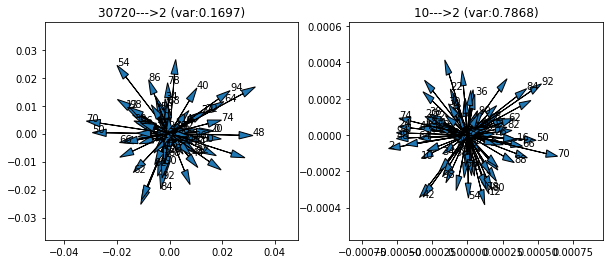

EP: 3
[(100, 30720), (100, 10)]


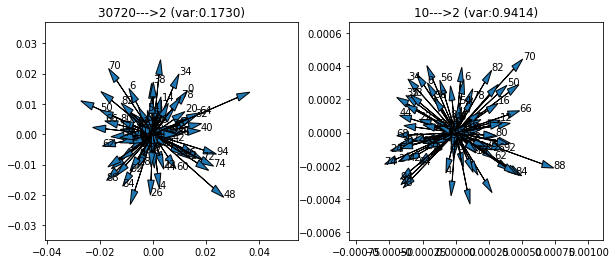

EP: 4
[(100, 30720), (100, 10)]


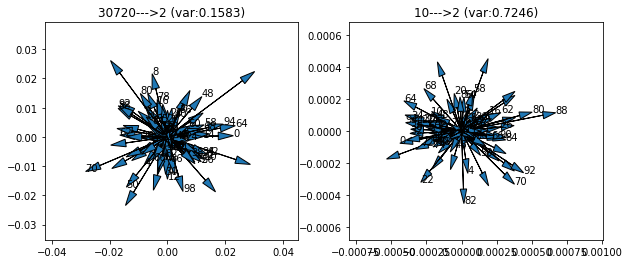

EP: 5
[(100, 30720), (100, 10)]


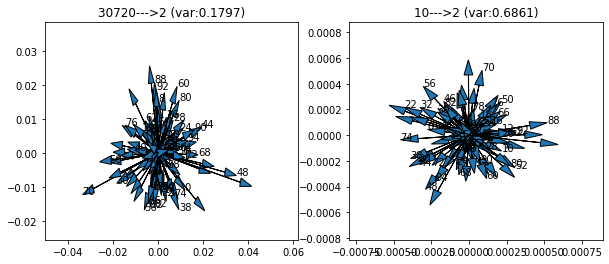

EP: 6
[(100, 30720), (100, 10)]


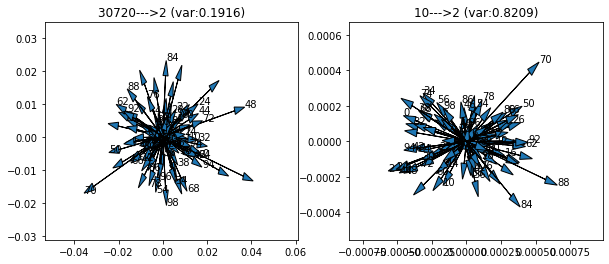

EP: 7
[(100, 30720), (100, 10)]


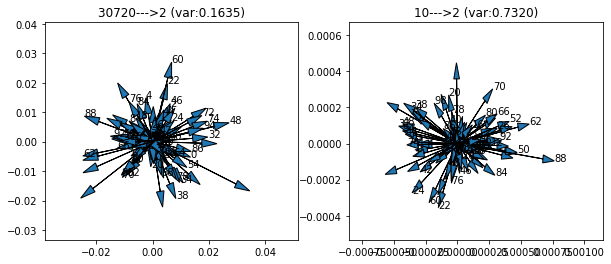

EP: 8
[(100, 30720), (100, 10)]


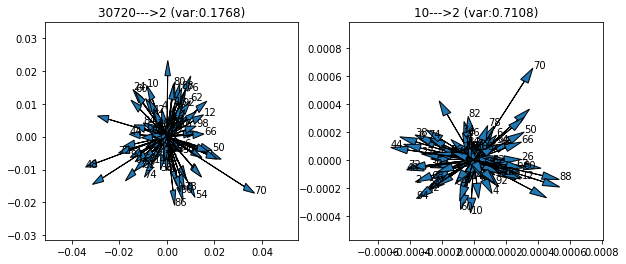

EP: 9
[(100, 30720), (100, 10)]


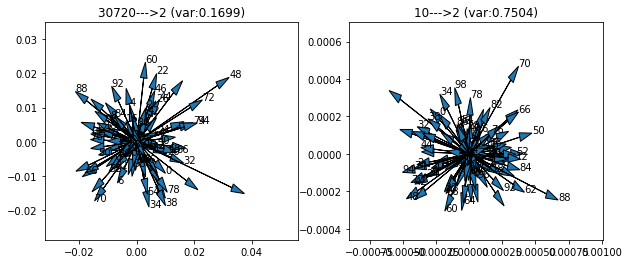

../ckpts/cifar_100/history/clf_fcn_noise_None_paradigm_sgd_uniform_True_non_iid_1_num_workers_100_lr_0.1_decay_1e-05_batch_0.pkl
EP: 0
[(100, 30720), (100, 10)]


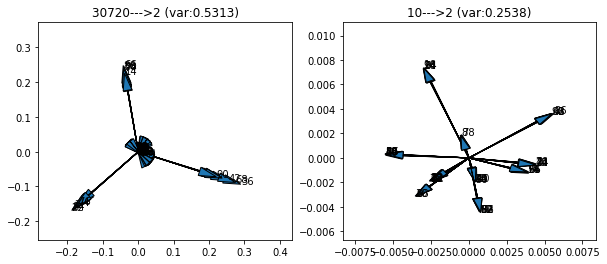

EP: 1
[(100, 30720), (100, 10)]


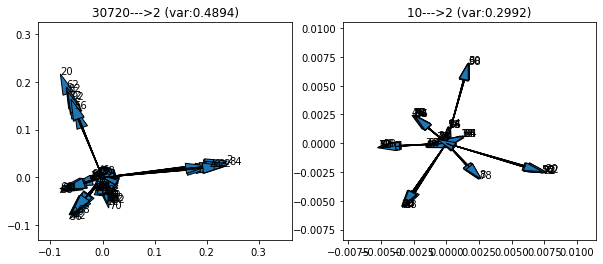

EP: 2
[(100, 30720), (100, 10)]


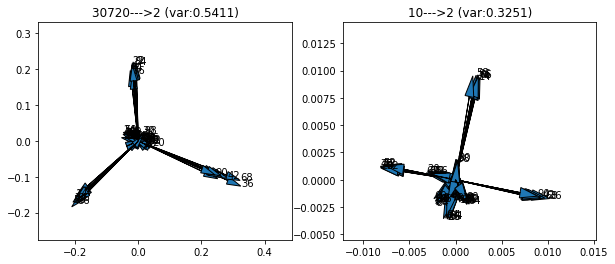

EP: 3
[(100, 30720), (100, 10)]


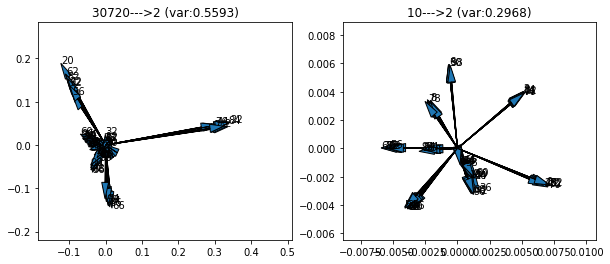

EP: 4
[(100, 30720), (100, 10)]


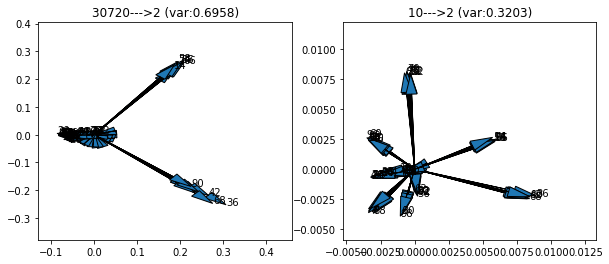

EP: 5
[(100, 30720), (100, 10)]


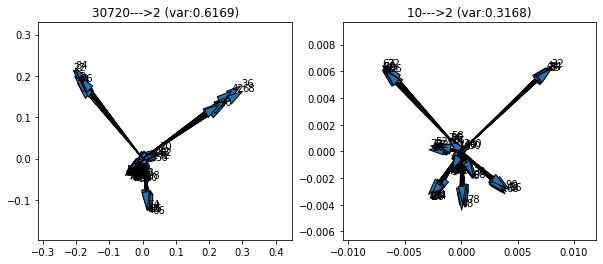

EP: 6
[(100, 30720), (100, 10)]


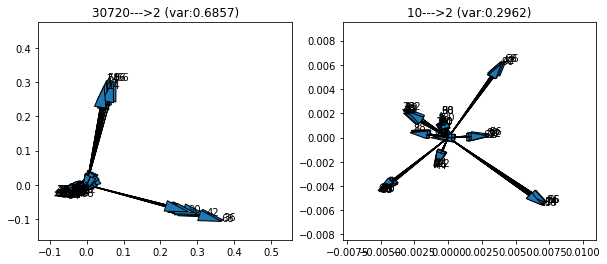

EP: 7
[(100, 30720), (100, 10)]


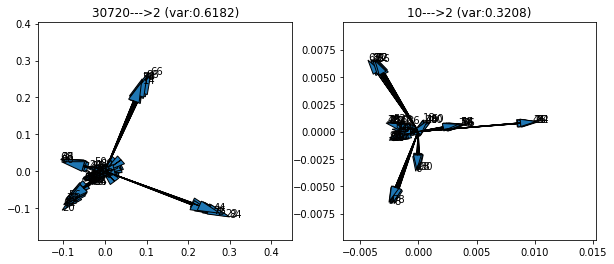

EP: 8
[(100, 30720), (100, 10)]


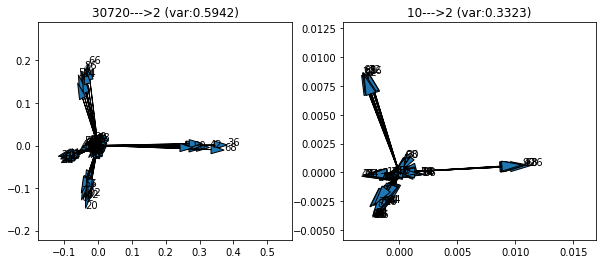

EP: 9
[(100, 30720), (100, 10)]


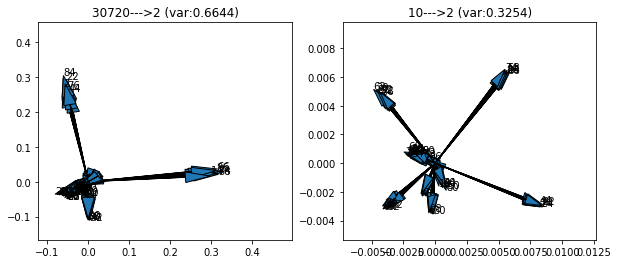

In [58]:
EPOCH = 10
folders = ['mnist_100', 'fmnist_100', 'cifar_100']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, 
                        ['conj', 'kgrad', 'topk', 
                         'adam', 'nc', 'rp', 'orth', 'pso'], 
                        ['lr_0.1', 'noise']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        extract = pkl.load(open(file, 'rb'))
        grads = extract[-1][:EPOCH]
        for idx, grad in enumerate(grads):
            print('EP: {}'.format(idx))
            mats = construct_grad_mat(grad)
            print([_.shape for x, _ in mats.items()])
            for _, mat in mats.items():
                if _%2 == 0:
                    plt.show()
                    ax = init_plots()
                    c = 0
                reduced_grads, var = pca_transform(mat, 2)
                title = '{}--->{} (var:{:.4f})'.format(
                    mat.shape[1], reduced_grads.shape[1], var
                )
                plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
                c += 1
            plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/clf_fcn_noise_None_paradigm_sgd_lr_0.01_decay_1e-05_batch_2048_distributed_sim.pkl
EPOCH: 0


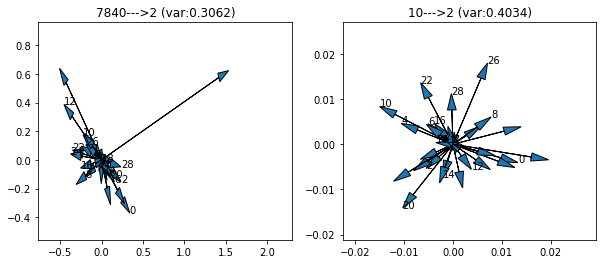

EPOCH: 1


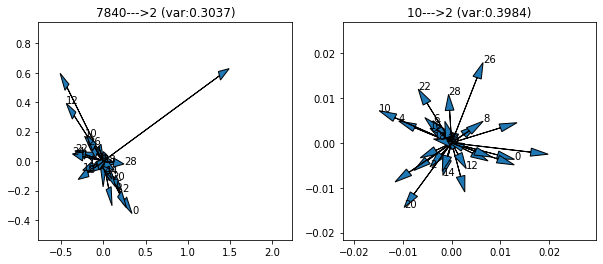

EPOCH: 2


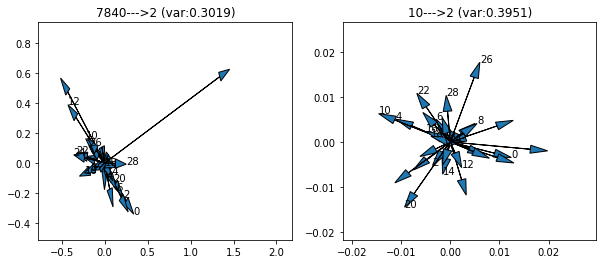

EPOCH: 3


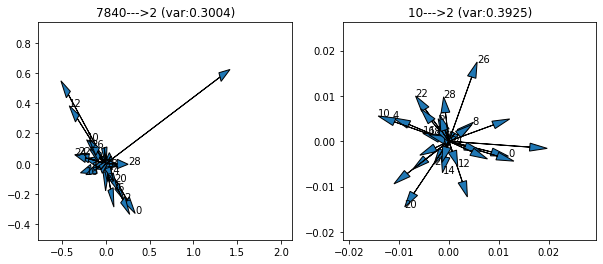

EPOCH: 4


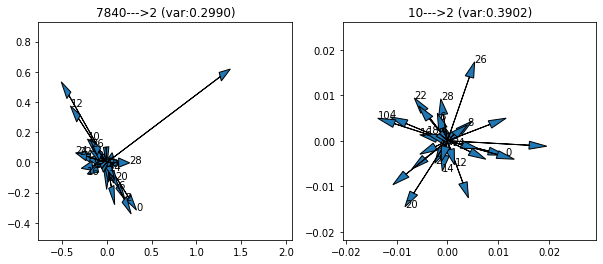

EPOCH: 5


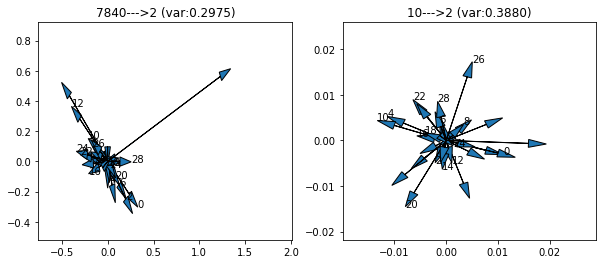

EPOCH: 6


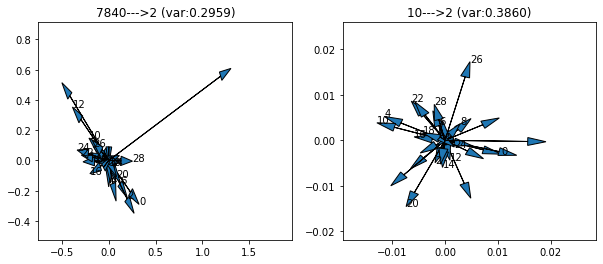

EPOCH: 7


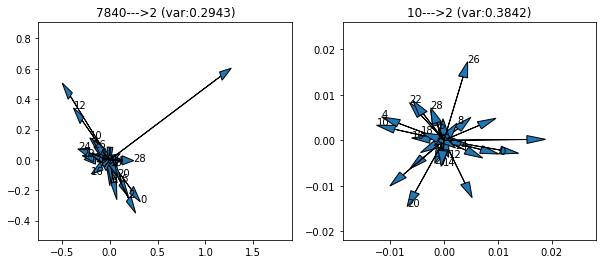

EPOCH: 8


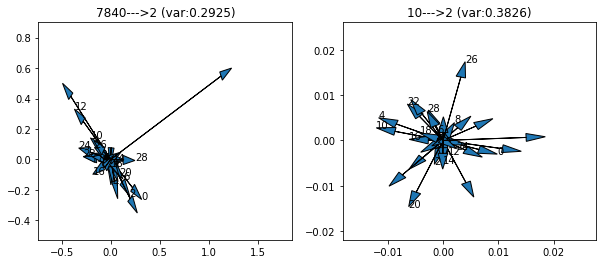

EPOCH: 9


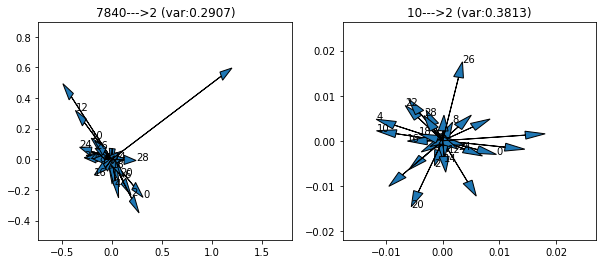

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [20]:
EPOCH = 10
folders = ['mnist_centralized', 'fmnist_centralized', 'cifar_centralized']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, 
                        ['conj', 'kgrad', 'topk', 
                         'adam', 'nc', 'rp', 'orth', 'pso'], 
                        ['lr_0.1', 'noise']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        extract = pkl.load(open(file, 'rb'))
        grads = extract[-1]
        mats = construct_grad_mat(grads[ep])
        for _, mat in mats.items():
            if _%2 == 0:
                plt.show()
                ax = init_plots()
                c = 0
            reduced_grads, var = pca_transform(mat, 2)
            title = '{}--->{} (var:{:.4f})'.format(
                mat.shape[1], reduced_grads.shape[1], var
            )
            plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
            c += 1
        plt.show()
        break

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/clf_fcn_noise_None_paradigm_sgd_lr_0.01_decay_1e-05_batch_0.pkl


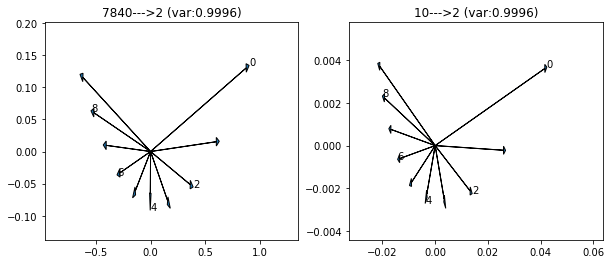

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.01_decay_1e-05_batch_16.pkl


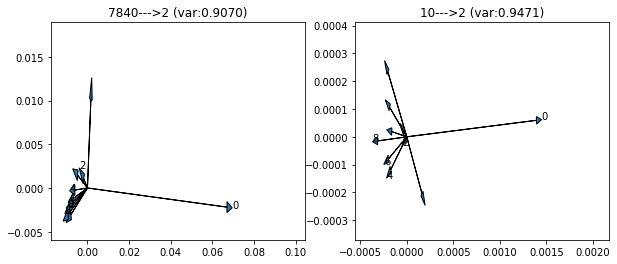

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/clf_fcn_paradigm_sgd_lr_0.01_decay_1e-05_batch_16.pkl


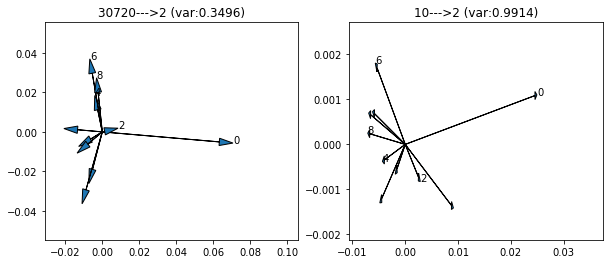

In [6]:
EPOCH = 10
folders = ['mnist_centralized', 'fmnist_centralized', 'cifar_centralized']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, ['kgrad', 'topk', 'adam', 'nc', 'rp'], ['lr_0.01']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        _,_,acc_test,_, loss_test, grads = pkl.load(open(file, 'rb'))
        mats = construct_grad_mat(grads[:EPOCH])
        for _, mat in mats.items():
            if _%2 == 0:
                plt.show()
                ax = init_plots()
                c = 0
            reduced_grads, var = pca_transform(mat, 2)
            title = '{}--->{} (var:{:.4f})'.format(
                mat.shape[1], reduced_grads.shape[1], var
            )
            plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
            c += 1
        plt.show()
        break

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.001_decay_1e-05_batch_16.pkl


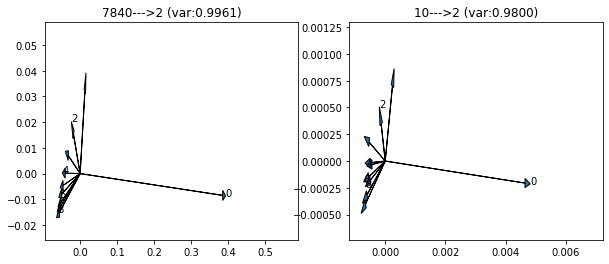

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.001_decay_1e-05_batch_16.pkl


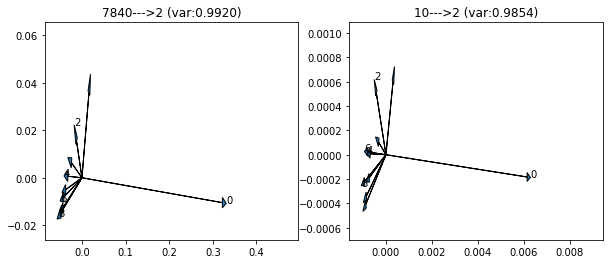

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/clf_fcn_paradigm_sgd_lr_0.001_decay_1e-05_batch_16.pkl


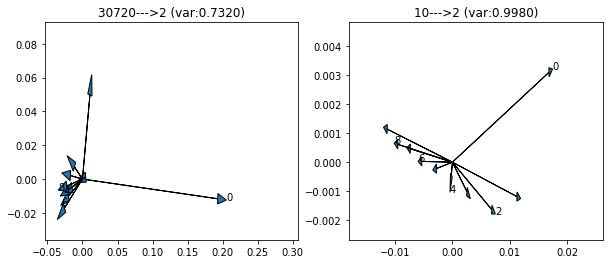

In [7]:
EPOCH = 10
folders = ['mnist_centralized', 'fmnist_centralized', 'cifar_centralized']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, ['kgrad', 'topk', 'adam', 'nc', 'rp'], ['lr_0.001']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        _,_,acc_test,_, loss_test, grads = pkl.load(open(file, 'rb'))
        mats = construct_grad_mat(grads[:EPOCH])
        for _, mat in mats.items():
            if _%2 == 0:
                plt.show()
                ax = init_plots()
                c = 0
            reduced_grads, var = pca_transform(mat, 2)
            title = '{}--->{} (var:{:.4f})'.format(
                mat.shape[1], reduced_grads.shape[1], var
            )
            plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
            c += 1
        plt.show()
        break